In [509]:
import pandas as pd
import numpy as np
import matplotlib as plt

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical 

tweets = pd.read_excel('tweets-stemmed.xlsx', usecols=['label','tweet_token_stemmed'])
tweets.columns = ['label','tweet']

tweets.head()

,label,tweet
0,0,"['awal', 'scene', 'bawang', 'nang', 'keinget',..."
1,1,"['gila', 'drama', 'cakep', 'cinematography', '..."
2,0,['jahat']
3,0,"['males', 'nonton', 'drakor', 'stalk', 'gtgt',..."
4,0,"['nam', 'do', 'san', 'emang', 'kasih', 'previe..."


In [510]:
temp = tweets['label'].value_counts()
plt.pl([0,1,2], height=temp)
plt.ylabel('tes')
plt.show()

AttributeError: module 'matplotlib' has no attribute 'barplot'

In [453]:
#parse string to list
import ast

#join list
def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])
tweets["tweet_join"] = tweets["tweet"].apply(join_text_list)
tweets["tweet_join"].head()

0    awal scene bawang nang keinget karakter romant...
1    gila drama cakep cinematography kece cerita ba...
2                                                jahat
3                 males nonton drakor stalk gtgt wkwkw
4    nam do san emang kasih preview dikit opening d...
Name: tweet_join, dtype: object

In [454]:
#define predictor and target for classification

target = 'label'
predictor = ['tweet_join']
y = tweets[target]
X = tweets[predictor]

print(X.head())
print(y.head())

                                          tweet_join
0  awal scene bawang nang keinget karakter romant...
1  gila drama cakep cinematography kece cerita ba...
2                                              jahat
3               males nonton drakor stalk gtgt wkwkw
4  nam do san emang kasih preview dikit opening d...
0    0
1    1
2    0
3    0
4    0
Name: label, dtype: int64


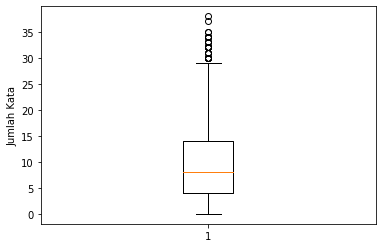

In [455]:
import matplotlib.pyplot as plt

def convert_text_list(texts):
    texts = ast.literal_eval(texts)
    return len(texts)

tweets["tweet_list"] = tweets["tweet"].apply(convert_text_list)

plt.boxplot(tweets["tweet_list"])
plt.ylabel('Jumlah Kata')
plt.show()

In [472]:
#testing
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer

max_features = 38

tf_idf = TfidfVectorizer()
X_tfidf = tf_idf.fit_transform(X['tweet_join']).toarray()
print(type(X_tfidf), X_tfidf.shape)

cv = CountVectorizer()
X_cv = cv.fit_transform(X['tweet_join']).toarray()
print(type(X_cv), X_cv.shape)

hv = HashingVectorizer()
X_hv = hv.fit_transform(X['tweet_join'])
print(type(X_hv), X_hv.shape)

<class 'numpy.ndarray'> (2085, 4724)
<class 'numpy.ndarray'> (2085, 4724)
<class 'scipy.sparse.csr.csr_matrix'> (2085, 1048576)


In [480]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.35, random_state=200)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

print(y_train.value_counts())
print(y_test.value_counts())

(1355, 4724)
(1355,)
(730, 4724)
(730,)
0    719
1    456
2    180
Name: label, dtype: int64
0    357
1    271
2    102
Name: label, dtype: int64


In [481]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

print(type(y_train_categorical),y_train_categorical.shape)
print(type(y_test_categorical),y_test_categorical.shape)

<class 'numpy.ndarray'> (1355, 3)
<class 'numpy.ndarray'> (730, 3)


In [482]:
#creating model sequential
model = Sequential()
model.add(Dense(64, input_dim=4724, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

#compile kelas model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
model.fit(X_train, y_train_categorical, epochs=20)

Epoch 1/20
1355/1355 [==============================] - 0s 339us/step - loss: 1.0604 - accuracy: 0.5144
Epoch 2/20
1355/1355 [==============================] - 0s 246us/step - loss: 0.9454 - accuracy: 0.5306
Epoch 3/20
1355/1355 [==============================] - 0s 215us/step - loss: 0.8289 - accuracy: 0.5579
Epoch 4/20
1355/1355 [==============================] - 0s 235us/step - loss: 0.6144 - accuracy: 0.7535
Epoch 5/20
1355/1355 [==============================] - 0s 211us/step - loss: 0.3609 - accuracy: 0.9203
Epoch 6/20
1355/1355 [==============================] - 0s 211us/step - loss: 0.1797 - accuracy: 0.9646
Epoch 7/20
1355/1355 [==============================] - ETA: 0s - loss: 0.0998 - accuracy: 0.97 - 0s 217us/step - loss: 0.1007 - accuracy: 0.9779
Epoch 8/20
1355/1355 [==============================] - 0s 211us/step - loss: 0.0649 - accuracy: 0.9860
Epoch 9/20
1355/1355 [==============================] - 0s 207us/step - loss: 0.0498 - accuracy: 0.9860
Epoch 10/20
1355/1355 

In [483]:
#evaluate train data

scores = model.evaluate(X_train, y_train_categorical)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   

1355/1355 [==============================] - 0s 81us/step
Accuracy on training data: 0.9926199316978455% 
 Error on training data: 0.007380068302154541


In [484]:
dataTesting = X_test
predictions = model.predict_classes(dataTesting)
predictions

array([0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 2,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1,
       0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,

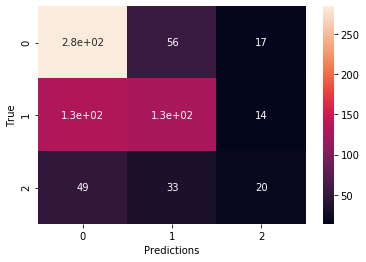

In [485]:
#evaluation confussion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

matrix = confusion_matrix(y_test, predictions)
sn.heatmap(matrix, annot=True)
plt.xlabel("Predictions")
plt.ylabel("True") 
plt.show()

In [486]:
#check accuration score from confussion matrix using library

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Error Rate: {:.2f}'.format(1 - accuracy_score(y_test, predictions)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, predictions, average='macro')))
print('Precision Score: {:.2f}'.format(precision_score(y_test, predictions, average='macro')))
print('Recall Score: {:.2f}'.format(recall_score(y_test, predictions, average='macro')))

Accuracy: 0.59
Error Rate: 0.41
F1 Score: 0.49
Precision Score: 0.53
Recall Score: 0.49
